## Importamos las Librerías:

In [58]:
import empiricaldist
import matplotlib.pyplot as plt
import janitor
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

In [59]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

## Cargamos el Data Frame:

In [3]:
datos = pd.read_csv('~/trabajo_infantil/data/probabilidad/congresos_electos.csv')
datos

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,Formula
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa
...,...,...,...,...,...,...,...,...,...,...,...
33106,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional
33107,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional
33108,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional
33109,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,YUDITH ELIZABETH RODRIGUEZ MARTINEZ,Mujer,No,Representación Proporcional


In [4]:
datos['Cargo'].value_counts()

Cargo
Regiduría                21600
Presidencia Municipal     4953
Sindicatura               3089
Diputación                2042
Consejal                  1400
Gubernatura                 26
Name: count, dtype: int64

## Realizamos la Unión entre los Votos Obtenidos y las Personas Electas:

### Cargamos el Conjunto de Datos:

In [5]:
votos = pd.read_csv('~/trabajo_infantil/data/probabilidad/congresos_votos.csv')
votos.head()

,Año,ID_estado,Nombre_estado,ID_municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No


### Seleccionamos los Cargos de Diputación:

In [6]:
datos.isnull().sum()

Año                     0
Nombre_estado           2
Municipio           25698
Cargo                   1
ID_Municipio         1953
Ayuntamiento         1951
Partido               377
Nombre_candidato       19
Sexo                   33
Coalición               0
Formula                 1
dtype: int64

In [7]:
datos = datos[datos['Cargo'] == 'Diputación']
datos

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,Formula
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa
...,...,...,...,...,...,...,...,...,...,...,...
33105,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,Representación Proporcional
33106,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional
33107,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional
33108,2023,COAHUILA,NaN,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional


In [8]:
datos['Formula'].value_counts()

Formula
Mayoría relativa               1240
Representación Proporcional     802
Name: count, dtype: int64

## Conocemos las Columnas de los Conjuntos de Datos:

In [9]:
print(datos.columns)
print(votos.columns)

Index(['Año', 'Nombre_estado', 'Municipio', 'Cargo', 'ID_Municipio',
       'Ayuntamiento', 'Partido', 'Nombre_candidato', 'Sexo', 'Coalición',
       'Formula'],
      dtype='object')
Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')


## Hacemos el Merge:

In [10]:
columnas_clave = ['Año', 'Nombre_estado', 'Municipio', 'Partido', 'Coalición']

for col in columnas_clave:
    datos[col] = datos[col].astype(str)
    votos[col] = votos[col].astype(str)

In [11]:
union = pd.merge(
    datos,
    votos,
    on=['Año', 'Nombre_estado', 'Municipio', 'Partido', 'Coalición'],
    how='left'  # Cambia a 'left', 'right' o 'outer' según lo que necesites
)
union

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,Formula,ID_estado,ID_municipio,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa,1.0,7.0,90.0,19391.0,14.0,966.0,20371.0,37004.0
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa,1.0,11.0,70.0,8520.0,5.0,340.0,8865.0,14826.0
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa,1.0,6.0,108.0,18387.0,12.0,704.0,19103.0,30679.0
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa,1.0,10.0,35.0,17104.0,15.0,552.0,17671.0,32309.0
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa,1.0,1.0,1210.0,362367.0,541.0,14264.0,377172.0,636960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Esandarizamos los Tipos de Variable:

In [12]:
union['Año'] = union['Año'].astype(int)
votos['Año'] = votos['Año'].astype(int)

## Conocemos las Columnas del conjunto de Datos:

In [13]:
print(votos.columns)

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')


## Observamos los Nombres dde las Columnas del Conjunto de Datos:

In [14]:
print("Columnas en votos:", list(votos.columns))

Columnas en votos: ['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio', 'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición']


## Guardamos en un nuevo objeto la Union:

In [15]:
registros = union
registros

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,Formula,ID_estado,ID_municipio,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa,1.0,7.0,90.0,19391.0,14.0,966.0,20371.0,37004.0
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa,1.0,11.0,70.0,8520.0,5.0,340.0,8865.0,14826.0
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa,1.0,6.0,108.0,18387.0,12.0,704.0,19103.0,30679.0
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa,1.0,10.0,35.0,17104.0,15.0,552.0,17671.0,32309.0
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa,1.0,1.0,1210.0,362367.0,541.0,14264.0,377172.0,636960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transformamos la Unión para Conocer, los Votos en caso de Coalición, y el Partido que más Contribuyó a las Coaliciones:

In [16]:
# Revisamos las columnas de votos primero
print(votos.columns)

# 1️⃣ Seleccionar las columnas necesarias del dataframe de votos ganador
columnas_a_rellenar = ['Votos', 'Votos_validos', 
                       'Votos_candidato_sin_registro', 'Votos_nulos', 
                       'Total_de_votos', 'Lista_nominal']

# Nos aseguramos que estas columnas están
columnas_ganadores = ['Año', 'Nombre_estado', 'Municipio', 'Partido', 'Coalición'] + columnas_a_rellenar

# Filtramos y ordenamos los datos de votos, luego eliminamos duplicados por Año, Nombre_estado, Municipio y Coalición.
ganadores = (
    votos[columnas_ganadores]
    .sort_values(['Año', 'Nombre_estado', 'Municipio', 'Votos'], ascending=[True, True, True, False])  # Ordenar por los votos en orden descendente
    .drop_duplicates(subset=['Año', 'Nombre_estado', 'Municipio'])  # Eliminar duplicados, manteniendo el partido con más votos
    .rename(columns={'Partido': 'Partido_ganador'})  # Renombramos la columna para no tener conflictos
)

print(ganadores.columns)

# 2️⃣ Merge controlado
# Hacemos un merge con las columnas relevantes de 'ganadores' en 'union'
union = pd.merge(
    union, 
    ganadores, 
    on=['Año', 'Nombre_estado','Municipio'],  # Unimos por Año, Nombre_estado y Municipio, sin Coalición
    how='left', 
    suffixes=('', '_ganador')  # Usamos un sufijo para identificar las columnas de los ganadores
)

# 3️⃣ Rellenamos solo los NaN usando los valores de ganadores
for col in columnas_a_rellenar:
    # Si hay valores NaN en las columnas originales de 'union', los rellenamos con los valores correspondientes de 'ganadores'
    union[col] = union[col].fillna(union[f"{col}_ganador"])

# Rellenamos la columna 'Partido' con el valor de 'Partido_ganador' si hay NaN
union['Partido'] = union['Partido'].fillna(union['Partido_ganador'])

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')
Index(['Año', 'Nombre_estado', 'Municipio', 'Partido_ganador', 'Coalición',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal'],
      dtype='object')


## Observamos el Data Frame:

In [17]:
union

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,...,Total_de_votos,Lista_nominal,Partido_ganador,Coalición_ganador,Votos_ganador,Votos_validos_ganador,Votos_candidato_sin_registro_ganador,Votos_nulos_ganador,Total_de_votos_ganador,Lista_nominal_ganador
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,...,20371.0,37004.0,PAN,No,5051.0,19391.0,14.0,966.0,20371.0,37004.0
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,...,8865.0,14826.0,MORENA,No,2435.0,8520.0,5.0,340.0,8865.0,14826.0
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,...,19103.0,30679.0,MORENA,No,4776.0,18387.0,12.0,704.0,19103.0,30679.0
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,...,17671.0,32309.0,PRI,No,5974.0,17104.0,15.0,552.0,17671.0,32309.0
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,...,377172.0,636960.0,PAN,No,125035.0,362367.0,541.0,14264.0,377172.0,636960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Realizamos la Nueva Unión para Mitigar los Datos Sesgados:

### Transformamos los Datos:

In [18]:
congresistas = votos
congresistas

,Año,ID_estado,Nombre_estado,ID_municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61513,2023,5,COAHUILA,38,ZARAGOZA,MORENA,947,5389,4,195,5588,11115,No
61514,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRI_PRD,27,5389,4,195,5588,11115,Sí
61515,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRI,33,5389,4,195,5588,11115,Sí
61516,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRD,2,5389,4,195,5588,11115,Sí


## Creamos una Función que Nos Permite Conocer los Votos por Coalición y la Cantidad Aportada por Cada Integrante:

In [19]:
# Función para sumar votos por municipio y actualizar los registros
def sumar_votos_por_municipio(df):
    # Crear una copia para no modificar el DataFrame original
    df = df.copy()

    # Agrupamos por las variables clave que definen un municipio
    grupos = df.groupby(['Año', 'ID_estado', 'Nombre_estado', 'Municipio'])

    # Crear una lista para guardar los nuevos registros procesados
    resultados = []

    for _, grupo in grupos:
        # Procesamos cada municipio de manera independiente
        partidos_compuestos = grupo[grupo['Partido'].str.contains("_", na=False)]

        # Actualizar votos de los partidos compuestos
        for _, row in partidos_compuestos.iterrows():
            componentes = row["Partido"].split("_")
            # Calcular la suma de votos de los componentes
            votos_componentes = grupo[grupo["Partido"].isin(componentes)]["Votos"].sum()
            # Sumar los votos al partido compuesto
            grupo.loc[grupo["Partido"] == row["Partido"], "Votos"] += votos_componentes

        # Guardar el grupo procesado
        resultados.append(grupo)

    # Combinar todos los grupos procesados en un solo DataFrame
    df_actualizado = pd.concat(resultados, ignore_index=True)
    return df_actualizado

# Aplicar la función al DataFrame "presidencia"
congresista_actualizada = sumar_votos_por_municipio(congresistas)

# Si quieres guardar el resultado
# presidencia_actualizada.to_csv("presidencia_actualizada.csv", index=False)

# Mostrar un ejemplo de los datos actualizados
print(congresista_actualizada.head())

    Año  ID_estado        Nombre_estado  ID_municipio Municipio    Partido  \
0  2015          3  BAJA CALIFORNIA SUR             1   COMONDU    PAN_PRS   
1  2015          3  BAJA CALIFORNIA SUR             1   COMONDU   PRI_PVEM   
2  2015          3  BAJA CALIFORNIA SUR             1   COMONDU  PRD_PT_MC   
3  2015          3  BAJA CALIFORNIA SUR             1   COMONDU       NUAL   
4  2015          3  BAJA CALIFORNIA SUR             1   COMONDU     MORENA   

   Votos  Votos_validos  Votos_candidato_sin_registro  Votos_nulos  \
0  12818          29183                            13          987   
1  10037          29183                            13          987   
2   4975          29183                            13          987   
3    351          29183                            13          987   
4    412          29183                            13          987   

   Total_de_votos  Lista_nominal Coalición  
0           30170          48403        Sí  
1           30170   

## Conocemos las Columnas del Nuevo Conjunto de Datos:

In [20]:
congresista_actualizada.columns

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')

## Transformamos los Valores del Nuevo Conjunto de Datos:

In [21]:
congresista_actualizada['Año'] = congresista_actualizada['Año'].astype(int)
datos['Año'] = datos['Año'].astype(int)

## Conocemos los Tipos de Variables del Conjunto de Datos:

In [22]:
print(datos.dtypes)
print(congresista_actualizada.dtypes)

Año                   int64
Nombre_estado        object
Municipio            object
Cargo                object
ID_Municipio        float64
Ayuntamiento         object
Partido              object
Nombre_candidato     object
Sexo                 object
Coalición            object
Formula              object
dtype: object
Año                              int64
ID_estado                        int64
Nombre_estado                   object
ID_municipio                     int64
Municipio                       object
Partido                         object
Votos                            int64
Votos_validos                    int64
Votos_candidato_sin_registro     int64
Votos_nulos                      int64
Total_de_votos                   int64
Lista_nominal                    int64
Coalición                       object
dtype: object


## Efecutuamos la Unión Preliminar:

In [23]:
union_1 = pd.merge(
    datos,
    congresista_actualizada,
    on=['Año', 'Nombre_estado', 'Municipio', 'Partido', 'Coalición'],
    how='left'  # Cambia a 'left', 'right' o 'outer' según lo que necesites
)
union_1

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,Formula,ID_estado,ID_municipio,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,Mayoría relativa,1.0,7.0,6171.0,19391.0,14.0,966.0,20371.0,37004.0
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,Mayoría relativa,1.0,11.0,3198.0,8520.0,5.0,340.0,8865.0,14826.0
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,Mayoría relativa,1.0,6.0,6896.0,18387.0,12.0,704.0,19103.0,30679.0
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,Mayoría relativa,1.0,10.0,4245.0,17104.0,15.0,552.0,17671.0,32309.0
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,Mayoría relativa,1.0,1.0,141119.0,362367.0,541.0,14264.0,377172.0,636960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,Representación Proporcional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Corroboramos que los Datos de la Unión Preliminar Coincidan con la Final:

In [24]:
print(union_1['Formula'].value_counts())
(union_1['Votos'].isnull().sum())

Formula
Mayoría relativa               1240
Representación Proporcional     802
Name: count, dtype: int64


1238

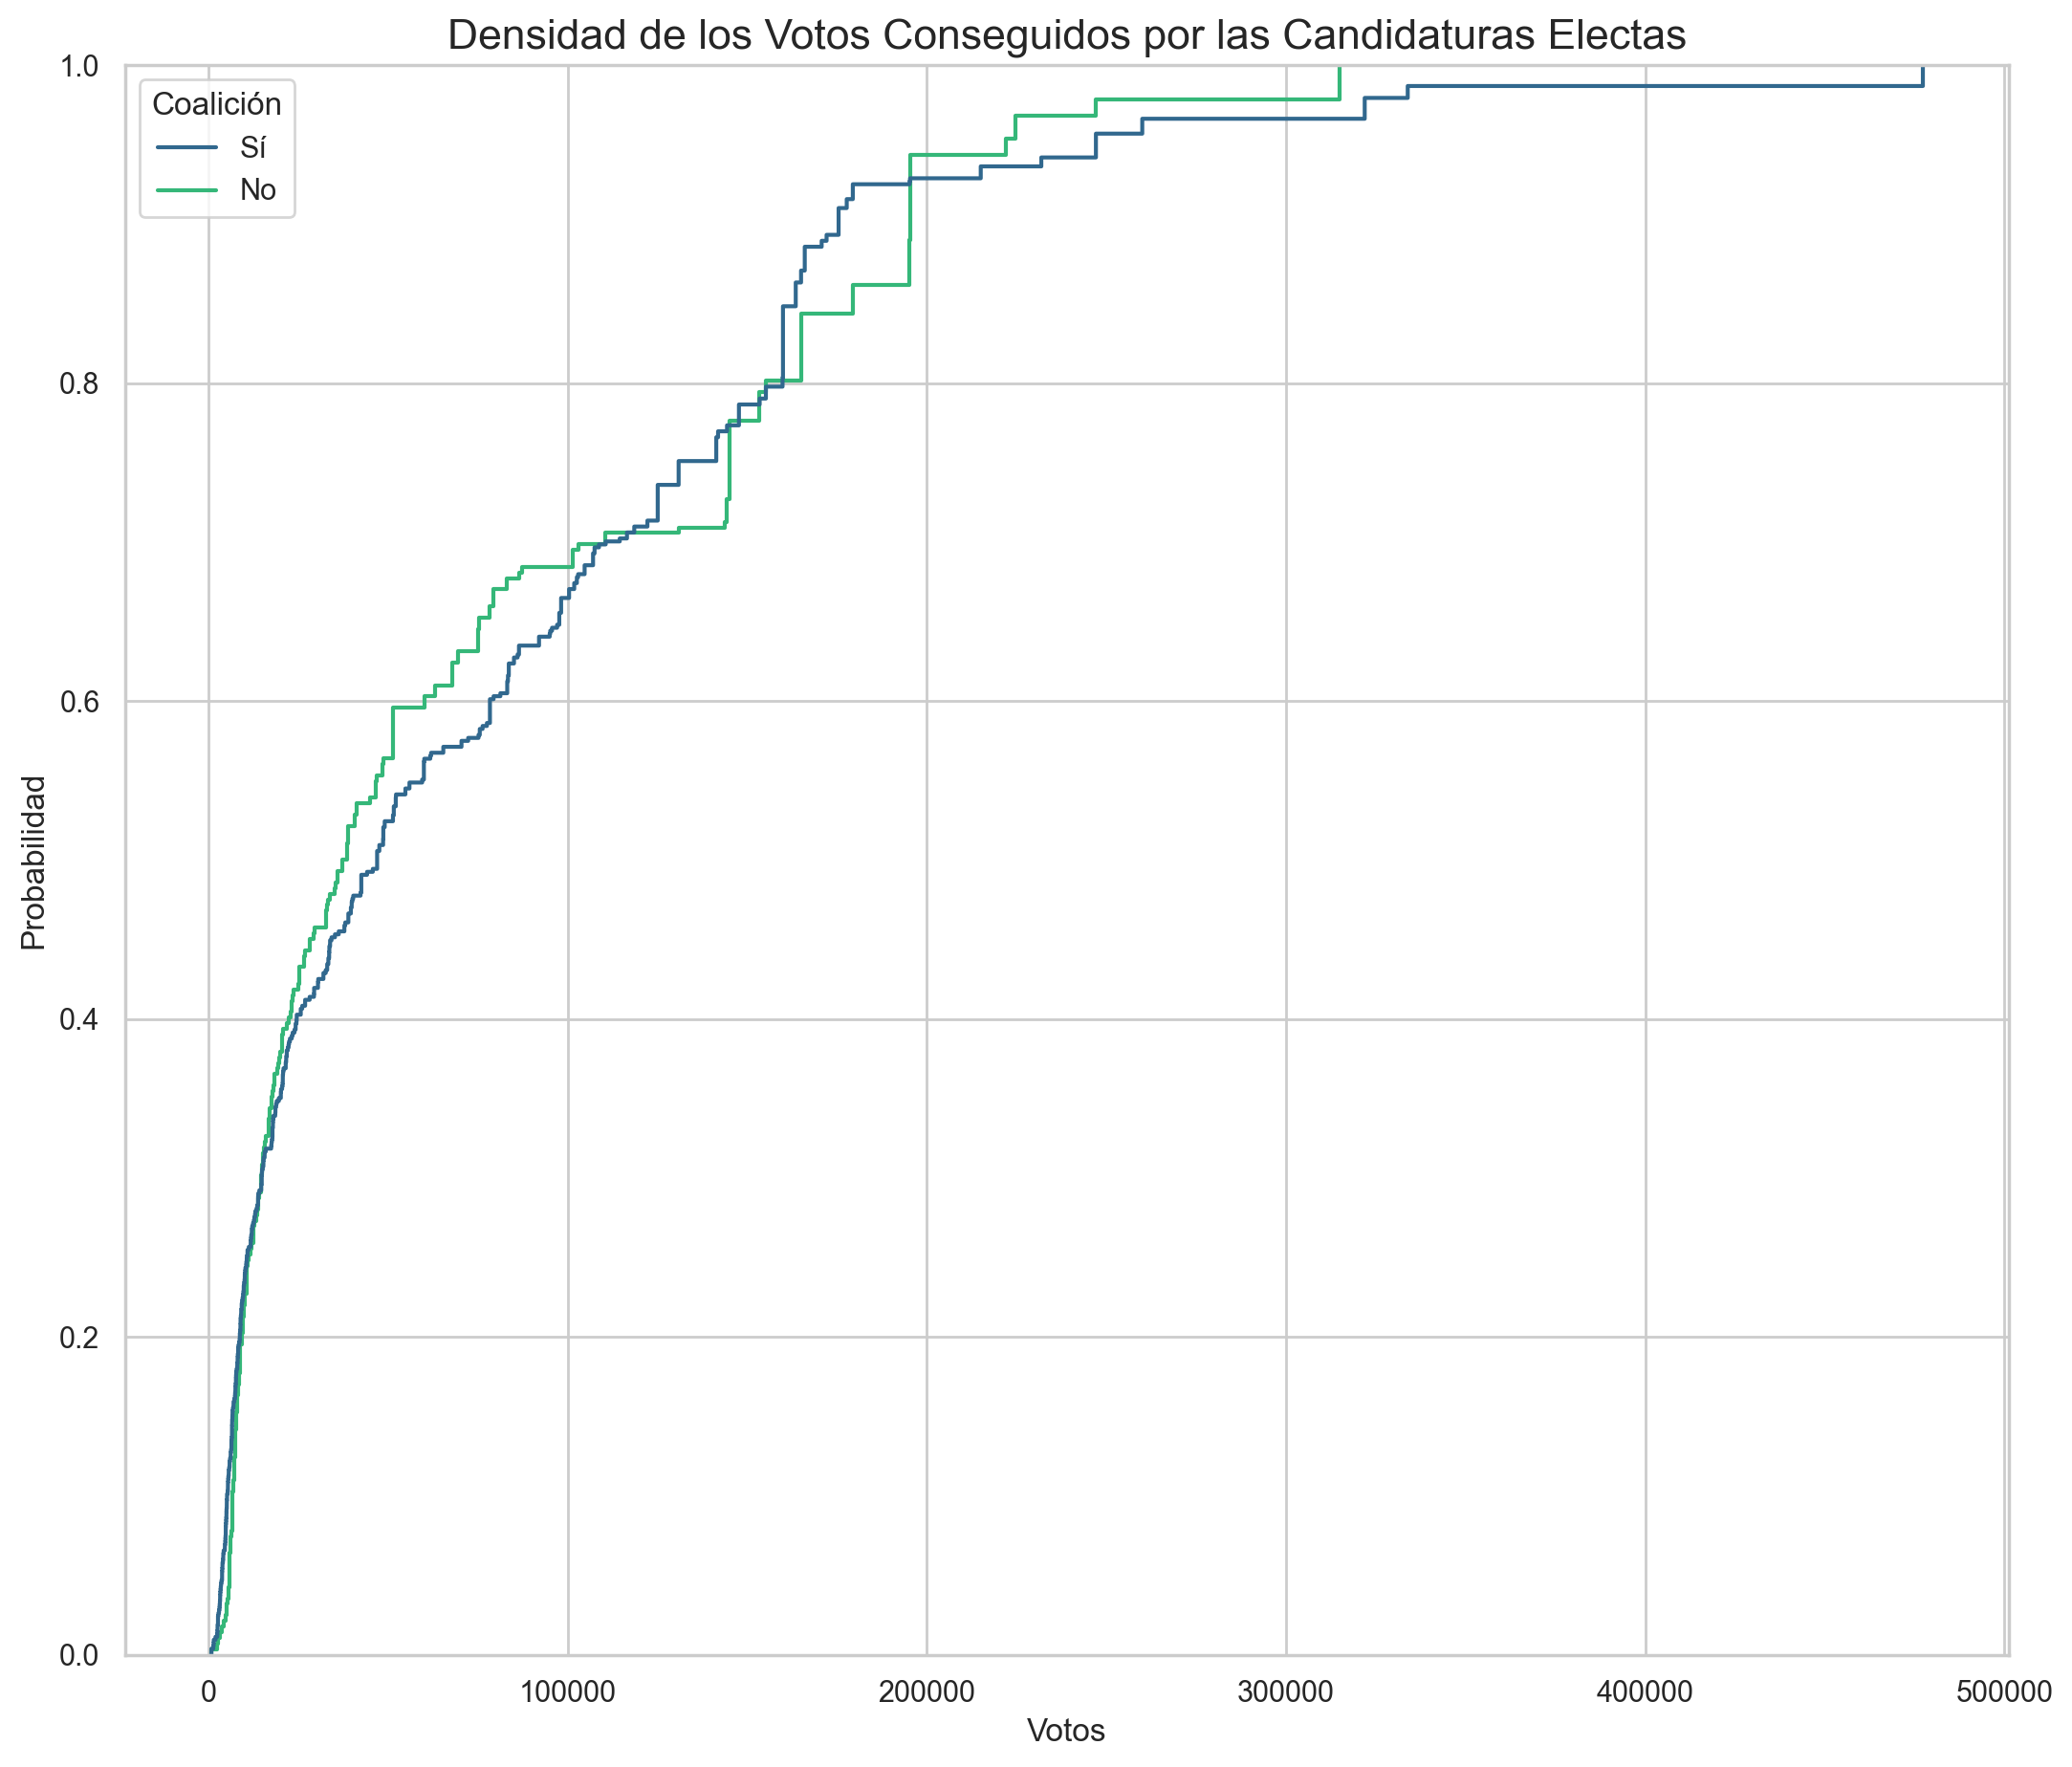

In [60]:
(
    union
    .pipe(
        lambda df: sns.ecdfplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos_ganador',
            hue = 'Coalición',
            palette= 'viridis'
        )
    )
)

plt.title('Densidad de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

In [62]:
union.columns

Index(['Año', 'Nombre_estado', 'Municipio', 'Cargo', 'ID_Municipio',
       'Ayuntamiento', 'Partido', 'Nombre_candidato', 'Sexo', 'Coalición',
       'Formula', 'ID_estado', 'ID_municipio', 'Votos', 'Votos_validos',
       'Votos_candidato_sin_registro', 'Votos_nulos', 'Total_de_votos',
       'Lista_nominal', 'Partido_ganador', 'Coalición_ganador',
       'Votos_ganador', 'Votos_validos_ganador',
       'Votos_candidato_sin_registro_ganador', 'Votos_nulos_ganador',
       'Total_de_votos_ganador', 'Lista_nominal_ganador'],
      dtype='object')

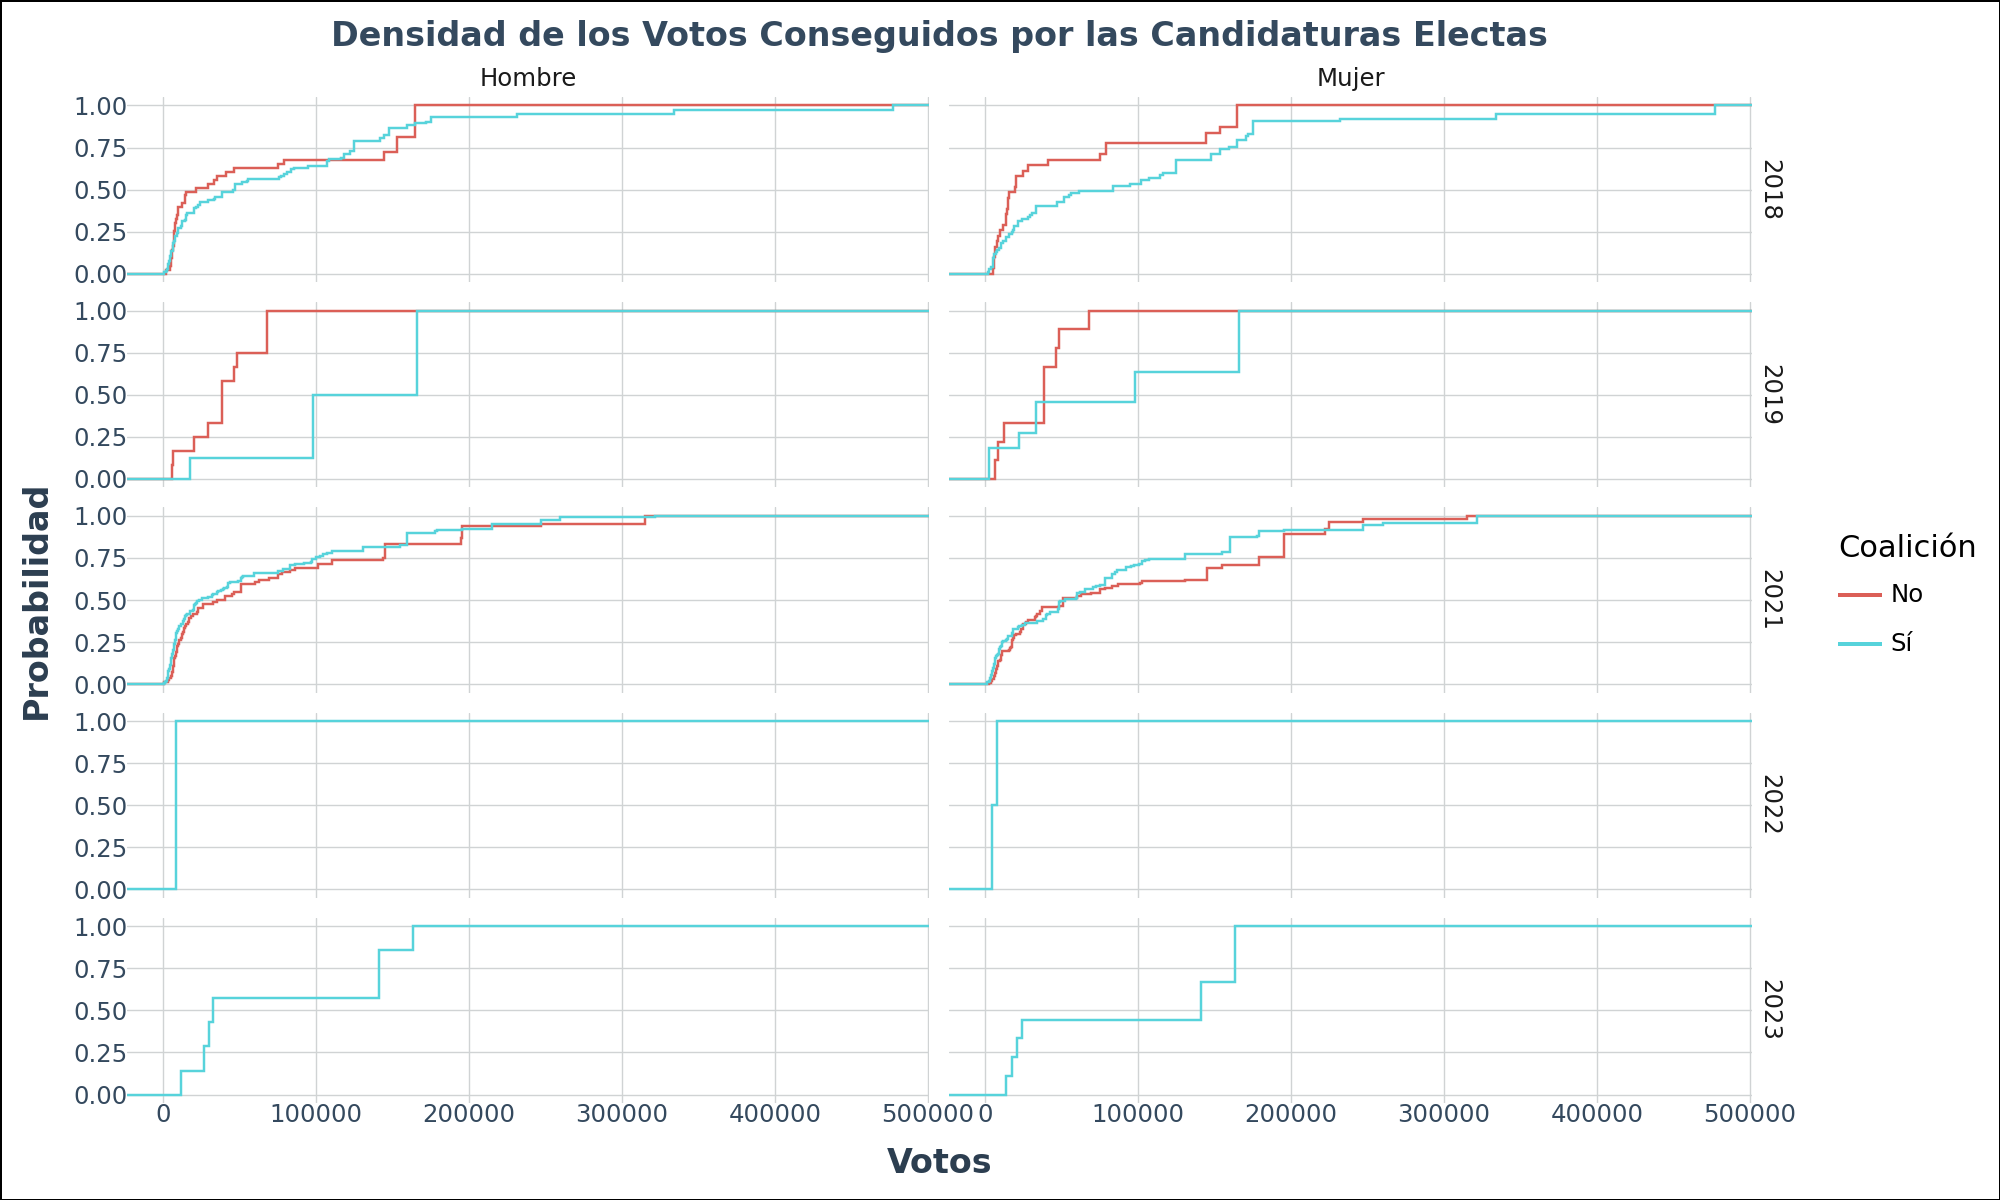

In [66]:
from plotnine import *
from plotnine import options
options.figure_size = (10, 6)

# Filtrar datos y crear el gráfico ECDF
grafico = (
    ggplot(union[union['Votos_ganador'] > 0], aes(x='Votos_ganador', color='Coalición')) +
    stat_ecdf() +
    labs(
        title="Densidad de los Votos Conseguidos por las Candidaturas Electas",
        x="Votos",
        y="Probabilidad"
    ) +
    facet_grid('Año~Sexo')+
    theme_minimal() +
    theme(
        plot_title=element_text(face="bold", ha="center", color="#34495E", size=12),
        axis_title_x=element_text(face="bold", color="#2C3E50", size=12),
        axis_title_y=element_text(face="bold", color="#2C3E50", size=12),
        axis_text=element_text(color="#34495E"),
        panel_grid_major=element_line(color="#D0D3D4", size=0.5),
        panel_grid_minor=element_blank()
    )
)

grafico += theme(plot_background=element_rect(fill="white"))
grafico.show()

## Realizamos la Unión Final:

In [28]:
# Revisamos las columnas de votos primero
print(congresista_actualizada.columns)

# 1️⃣ Seleccionar las columnas necesarias del dataframe de votos ganador
columnas_a_rellenar = ['Votos', 'Votos_validos', 
                       'Votos_candidato_sin_registro', 'Votos_nulos', 
                       'Total_de_votos', 'Lista_nominal']

# Nos aseguramos que estas columnas están
columnas_ganadores = ['Año', 'Nombre_estado', 'Municipio', 'Partido', 'Coalición'] + columnas_a_rellenar

ganadores = (
    congresista_actualizada[columnas_ganadores]
    .sort_values(['Año', 'Nombre_estado', 'Municipio', 'Votos'], ascending=[True, True, True, False])  # Ordenar por los votos en orden descendente
    .drop_duplicates(subset=['Año', 'Nombre_estado', 'Municipio'])  # Eliminar duplicados, manteniendo el partido con más votos
    .rename(columns={'Partido': 'Partido_ganador'})  # Renombramos la columna para no tener conflictos
)

print(ganadores.columns)

# 2️⃣ Merge controlado
union_1 = pd.merge(
    union_1, 
    ganadores, 
    on=['Año', 'Nombre_estado','Municipio'],
    how='left', 
    suffixes=('', '_ganador')
)

# 3️⃣ Rellenamos solo los NaN usando los valores de ganadores
for col in columnas_a_rellenar:
    union_1[col] = union_1[col].fillna(union_1[f"{col}"])

# Rellenamos Partido
union_1['Partido'] = union_1['Partido'].fillna(union_1['Partido_ganador'])

Index(['Año', 'ID_estado', 'Nombre_estado', 'ID_municipio', 'Municipio',
       'Partido', 'Votos', 'Votos_validos', 'Votos_candidato_sin_registro',
       'Votos_nulos', 'Total_de_votos', 'Lista_nominal', 'Coalición'],
      dtype='object')
Index(['Año', 'Nombre_estado', 'Municipio', 'Partido_ganador', 'Coalición',
       'Votos', 'Votos_validos', 'Votos_candidato_sin_registro', 'Votos_nulos',
       'Total_de_votos', 'Lista_nominal'],
      dtype='object')


## Corroboramos que los Datos de la Unión Final Coincidan:

In [29]:
print(union_1['Formula'].value_counts())
(union_1['Votos'].isnull().sum())

Formula
Mayoría relativa               1240
Representación Proporcional     802
Name: count, dtype: int64


1238

## Observamos el Conjunto de Datos:

In [30]:
union_1

,Año,Nombre_estado,Municipio,Cargo,ID_Municipio,Ayuntamiento,Partido,Nombre_candidato,Sexo,Coalición,...,Total_de_votos,Lista_nominal,Partido_ganador,Coalición_ganador,Votos_ganador,Votos_validos_ganador,Votos_candidato_sin_registro_ganador,Votos_nulos_ganador,Total_de_votos_ganador,Lista_nominal_ganador
0,2018,AGUASCALIENTES,RINCON DE ROMOS,Diputación,NaN,NaN,PAN_PRD_MC,MONICA JANETH JIMENEZ RODRIGUEZ,Mujer,Sí,...,20371.0,37004.0,PAN_PRD_MC,Sí,6171.0,19391.0,14.0,966.0,20371.0,37004.0
1,2018,AGUASCALIENTES,EL LLANO,Diputación,NaN,NaN,PT_MORENA_ES,JOSE MANUEL GONZALEZ MOTA,Hombre,Sí,...,8865.0,14826.0,PT_MORENA_ES,Sí,3198.0,8520.0,5.0,340.0,8865.0,14826.0
2,2018,AGUASCALIENTES,PABELLON DE ARTEAGA,Diputación,NaN,NaN,PAN_PRD_MC,JORGE SAUCEDO GAYTAN,Hombre,Sí,...,19103.0,30679.0,PAN_PRD_MC,Sí,6896.0,18387.0,12.0,704.0,19103.0,30679.0
3,2018,AGUASCALIENTES,SAN FRANCISCO DE LOS ROMO,Diputación,NaN,NaN,PAN_PRD_MC,KARINA IVETTE EUDAVE DELGADO,Mujer,Sí,...,17671.0,32309.0,PRI,No,5974.0,17104.0,15.0,552.0,17671.0,32309.0
4,2018,AGUASCALIENTES,AGUASCALIENTES,Diputación,NaN,NaN,PAN_PRD_MC,SALVADOR PEREZ SANCHEZ,Hombre,Sí,...,377172.0,636960.0,PAN_PRD_MC,Sí,141119.0,362367.0,541.0,14264.0,377172.0,636960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,WENDY BALCAZAR PEREZ,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,DELIA AURORA HERNÁNDEZ ALVARADO,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2039,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,ROSAURA MONROY BECERRIL,Mujer,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,2023,COAHUILA,nan,Diputación,NaN,NaN,MORENA,LUIS JAIME PONCE ORTIZ,Hombre,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


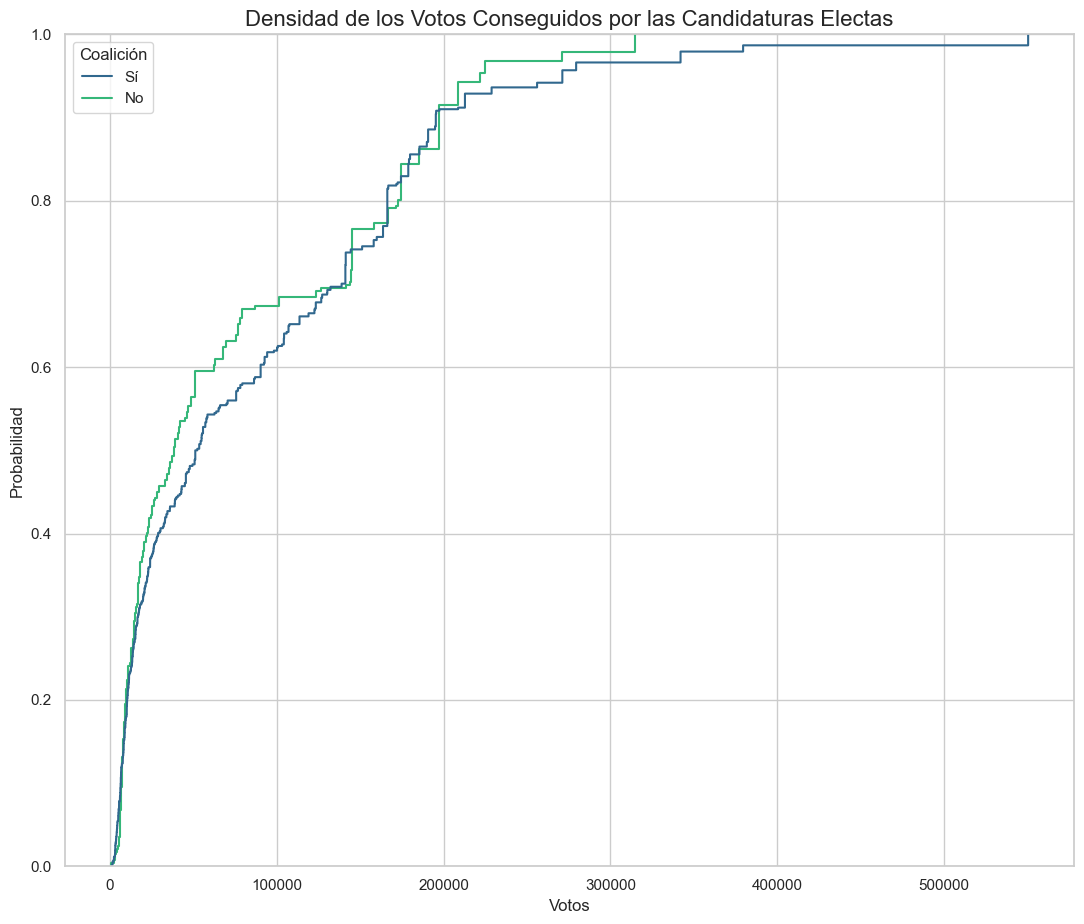

In [31]:
(
    union_1
    .pipe(
        lambda df: sns.ecdfplot(
            data = df[df['Votos_ganador'] > 0],
            x = 'Votos_ganador',
            hue = 'Coalición',
            palette= 'viridis'
        )
    )
)

plt.title('Densidad de los Votos Conseguidos por las Candidaturas Electas', size = 16)
plt.xlabel('Votos')
plt.ylabel('Probabilidad')
plt.tight_layout()
plt.show()

## Alternativa:

In [32]:
# Crear la columna de votos ajustados inicialmente igual a 'Votos'
congresistas['Nuevo_Votos'] = congresistas['Votos']

# Iterar solo sobre los registros con '_'
for index, row in congresistas[congresistas['Partido'].str.contains("_", na=False)].iterrows():
    partidos = row['Partido'].split("_")  # Separar los partidos de la coalición

    # Filtrar los votos de los partidos individuales dentro del mismo municipio
    filtro = (
        (congresistas['Año'] == row['Año']) &
        (congresistas['ID_estado'] == row['ID_estado']) &
        (congresistas['Nombre_estado'] == row['Nombre_estado']) &
        (congresistas['Municipio'] == row['Municipio']) &
        (congresistas['Partido'].isin(partidos))
    )

    # Sumar los votos de los partidos involucrados en la coalición dentro del mismo municipio
    total_votos = congresistas.loc[filtro, 'Votos'].sum()

    # Asignar la suma a 'Nuevo_Votos' solo en la fila de la coalición
    congresistas.at[index, 'Nuevo_Votos'] = total_votos

# Mostrar los resultados
print(congresistas[['Año', 'ID_estado', 'Municipio', 'Partido', 'Votos', 'Nuevo_Votos']])

        Año  ID_estado Municipio      Partido  Votos  Nuevo_Votos
0      2015          3   COMONDU      PAN_PRS  12818            0
1      2015          3   COMONDU     PRI_PVEM  10037            0
2      2015          3   COMONDU    PRD_PT_MC   4975            0
3      2015          3   COMONDU         NUAL    351          351
4      2015          3   COMONDU       MORENA    412          412
...     ...        ...       ...          ...    ...          ...
61513  2023          5  ZARAGOZA       MORENA    947          947
61514  2023          5  ZARAGOZA  PAN_PRI_PRD     27         2332
61515  2023          5  ZARAGOZA      PAN_PRI     33         2280
61516  2023          5  ZARAGOZA      PAN_PRD      2          323
61517  2023          5  ZARAGOZA     PVEM_UDC     16         1214

[61518 rows x 6 columns]


## Obervamos el Conjunto de Datos (Con este ya se Podría hacer un Nuevo Merge) como Unión_1:

In [33]:
congresistas

,Año,ID_estado,Nombre_estado,ID_municipio,Municipio,Partido,Votos,Votos_validos,Votos_candidato_sin_registro,Votos_nulos,Total_de_votos,Lista_nominal,Coalición,Nuevo_Votos
0,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PAN_PRS,12818,29183,13,987,30170,48403,Sí,0
1,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRI_PVEM,10037,29183,13,987,30170,48403,Sí,0
2,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,PRD_PT_MC,4975,29183,13,987,30170,48403,Sí,0
3,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,NUAL,351,29183,13,987,30170,48403,No,351
4,2015,3,BAJA CALIFORNIA SUR,1,COMONDU,MORENA,412,29183,13,987,30170,48403,No,412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61513,2023,5,COAHUILA,38,ZARAGOZA,MORENA,947,5389,4,195,5588,11115,No,947
61514,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRI_PRD,27,5389,4,195,5588,11115,Sí,2332
61515,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRI,33,5389,4,195,5588,11115,Sí,2280
61516,2023,5,COAHUILA,38,ZARAGOZA,PAN_PRD,2,5389,4,195,5588,11115,Sí,323
